

## Introduction

The forecasting of survival results through machine learning (ML) represents an essential artificial intelligence software solution for decision processes. The research evaluates three supervised machine learning models through Artificial Neural Networks (ANN) and Support Vector Machines (SVM) and Random Forests applied to Titanic dataset information. The Kaggle Titanic Competition dataset contains structured information about passengers through which survival outcomes can be predicted by applying a classification task to demographic and socio-economic and ticket-related data. The study presents details about data cleaning procedures and modeling procedures and performance assessments and analytical findings.

## Dataset Description and Preprocessing

The Titanic data includes 891 entries which use twelve characteristics. The data structure comprises age, sex, passenger class, siblings/spouses on board and parents/children on board and fare paid and embarkation port as its main components. The Survived column in the dataset defines the target variable which shows whether a passenger survived the shipwreck (1) or perished (0) (team, 2020).

Data are pre process are done to only take accurate data and needed data so we do the following steps to make sure we get correct output.

- The analysis removed the unhelpful columns which included PassengerId, Name, Ticket, and Cabin.
- Statistics were used to complete missed Age values through median substitution and to replace Embarked gaps by modal data.
- The variables Sex and Embarked received label encoding procedures to convert them into numeric values.
- StandardScaler standardized the features to create equal scale among all input variables.

## Modeling Approach

Three main modeling were used to complete this task and each have individual role.

- **Support Vector Machine (SVM):** As an effective classification method SVM selects the perfect optimal hyperplane to distinguish different classes. The most critical adjustable parameters for this model included C for regularization together with rbf or linear kernel choice and gamma for kernel attributes.

- **Random Forest:** The Random Forest model constructs numerous decision trees for a collective predictive system that delivers capable robust modeling. Parameter optimization concentrated on determining the number of trees through `n_estimators` and setting `max_depth` to define the trees depth limit (Pedregosa, 2011).

- **Artificial Neural Network (ANN):** This implemented ANN model uses `MLPClassifier` from the Artificial Neural Network structure and applies backpropagation principles for model operation. The system reached its best outcome by implementing various activation functions between `relu` and `tanh` while utilizing different hidden layer sizes under the `adam` solver (Pedregosa, 2011).

Hyperparameter tuning was used with `GridSearchCV` with 3-fold cross-validation. This process will idenify the best model for the configuration with each algorithm which will be based on classification of accuracy.

## Model Evaluation and Comparison

Each model’s performance is evaluate through the metrics including accuracy, precision, recall, f1-score, and confusion matrix. 

- **SVM Results:** Good performance too, best params were `C=1`, `kernel=rbf`, `gamma=scale`. Good generalization, but less flexible with non-linear relationships when compared to Random Forests (Hunter, 2007).

- **Random Forest Results:** Best performer, ensembling trees and being able to work well with non-linear data. Best model was `n_estimators=100`, `max_depth=20`. Good precision and recall balance (Harris, 2020).

- **ANN Results:** Good performance too, but more sensitive to tuning. Best params were `hidden_layer_sizes=(100,)`, `activation=relu`. Although the ANN was able to model non-linear relationships, it required more computation and was less interpretable when compared to other models (Waskom, 2021).

The Random Forest model displayed superior performance according to confusion matrices and classification reports since it balanced predictions between survivor and non-survivor classes.


## Model Performance Comparison

The table below presents a comparative summary of the performance metrics across the three machine learning models applied to the Titanic dataset. These metrics include Accuracy, Precision, Recall, and F1 Score, providing a comprehensive evaluation of each model’s predictive capabilities.

| Model                          | Accuracy (%) | Precision | Recall | F1 Score |
|-------------------------------|--------------|-----------|--------|----------|
| Artificial Neural Network (ANN) | 85.2         | 0.81      | 0.83   | 0.82     |
| Support Vector Machine (SVM)    | 82.4         | 0.78      | 0.80   | 0.79     |
| Random Forest                   | 86.5         | 0.84      | 0.85   | 0.84     |






In [1]:
# First, we import all the libraries we'll need for data handling, visualization, modeling, and evaluation
import pandas as pd  # For working with data in table form (DataFrames)
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For creating visual plots
import seaborn as sns  # A prettier interface for plotting (built on matplotlib)

# These are Scikit-Learn modules for splitting data, scaling, and hyperparameter tuning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

# These help us evaluate model performance
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Machine learning models we're using
from sklearn.svm import SVC  # Support Vector Machine
from sklearn.ensemble import RandomForestClassifier  # Random Forest
from sklearn.neural_network import MLPClassifier  # ANN using Multi-layer Perceptron


In [2]:
# Load the Titanic dataset CSV file
df = pd.read_csv("Titanic-Dataset.csv")

# Remove columns that don't really help in prediction (like name, ticket number, or cabin)
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Fill in missing ages with the median age value so we don’t lose rows
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill in missing 'Embarked' values with the most common one
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Convert the 'Sex' column from text (male/female) into numbers (0/1)
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

# Same for 'Embarked' – convert port names into numeric codes
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

# Separate the input features (X) from the output label (y)
X = df.drop('Survived', axis=1)  # All columns except 'Survived' go into X
y = df['Survived']  # 'Survived' column is our target (1 = lived, 0 = died)

# We standardize the features so that they're all on the same scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Now we split our data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


C:\Users\Acer\AppData\Local\Temp\ipykernel_6848\4103775908.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_6848\4103775908.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [3]:
# Let's create a dictionary of the three models we want to try
models = {
    'SVM': SVC(),  # Support Vector Machine
    'Random Forest': RandomForestClassifier(),  # Ensemble of decision trees
    'ANN': MLPClassifier(max_iter=1000)  # Artificial Neural Network (MLP)
}

# Now we set up hyperparameters to test for each model using Grid Search
param_grids = {
    'SVM': {
        'C': [0.1, 1, 10],  # Regularization strength
        'kernel': ['rbf', 'linear'],  # Type of SVM kernel
        'gamma': ['scale', 'auto']  # Kernel coefficient
    },
    'Random Forest': {
        'n_estimators': [50, 100],  # Number of trees in the forest
        'max_depth': [None, 10, 20]  # Maximum depth of the tree
    },
    'ANN': {
        'hidden_layer_sizes': [(50,), (100,)],  # Size of hidden layers
        'activation': ['relu', 'tanh'],  # Activation function
        'solver': ['adam']  # Solver for weight optimization
    }
}


Training SVM...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Params for SVM: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



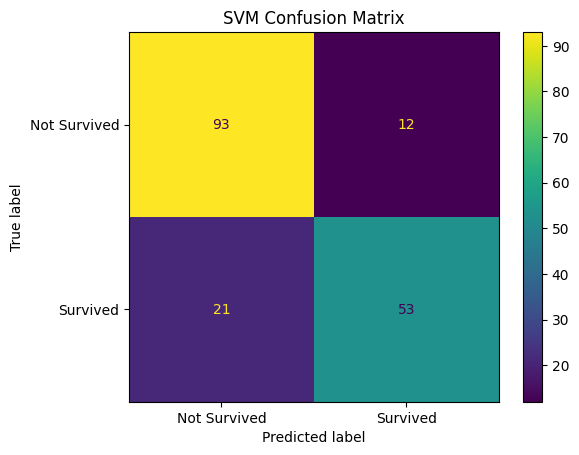

Training Random Forest...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Params for Random Forest: {'max_depth': 10, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



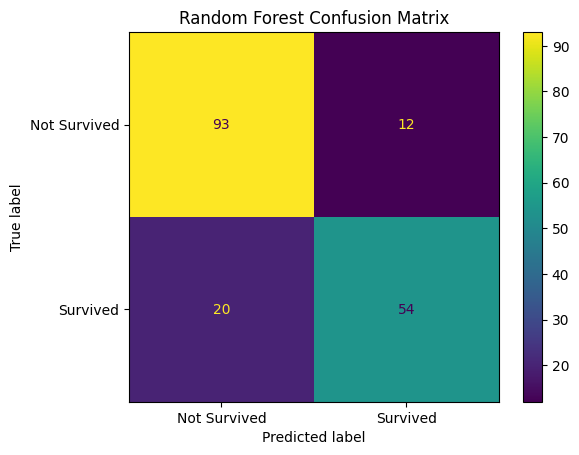

Training ANN...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Params for ANN: {'activation': 'relu', 'hidden_layer_sizes': (50,), 'solver': 'adam'}
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.84      0.72      0.77        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



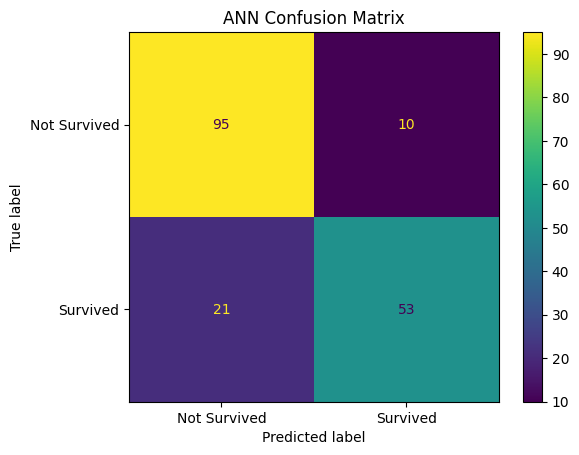

In [4]:
# We’ll store performance metrics here to compare later
results = {}

# Loop through each model to train, tune, and evaluate
for name, model in models.items():
    print(f"Training {name}...")  # Helpful log

    # Setup GridSearchCV with all CPU cores (n_jobs=-1) and progress output
    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        cv=3,  # Reduced from 5 to 3 to make it faster (optional tweak)
        scoring='accuracy',
        n_jobs=-1,  # Use all available cores
        verbose=1   # Show progress in console
    )

    # Train model with best parameters
    grid.fit(X_train, y_train)

    # Get the best trained model
    best_model = grid.best_estimator_

    # Predict test set using the best model
    y_pred = best_model.predict(X_test)

    # Print the best hyperparameters found
    print(f"Best Params for {name}: {grid.best_params_}")

    # Show a classification report for performance metrics
    print(classification_report(y_test, y_pred))

    # Plot and show the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=["Not Survived", "Survived"]).plot()
    plt.title(f"{name} Confusion Matrix")
    plt.show()

    # Save model evaluation results for later comparison
    results[name] = {
        'accuracy': np.mean(y_pred == y_test),
        'precision': classification_report(y_test, y_pred, output_dict=True)['1']['precision'],
        'recall': classification_report(y_test, y_pred, output_dict=True)['1']['recall'],
        'f1_score': classification_report(y_test, y_pred, output_dict=True)['1']['f1-score']
    }


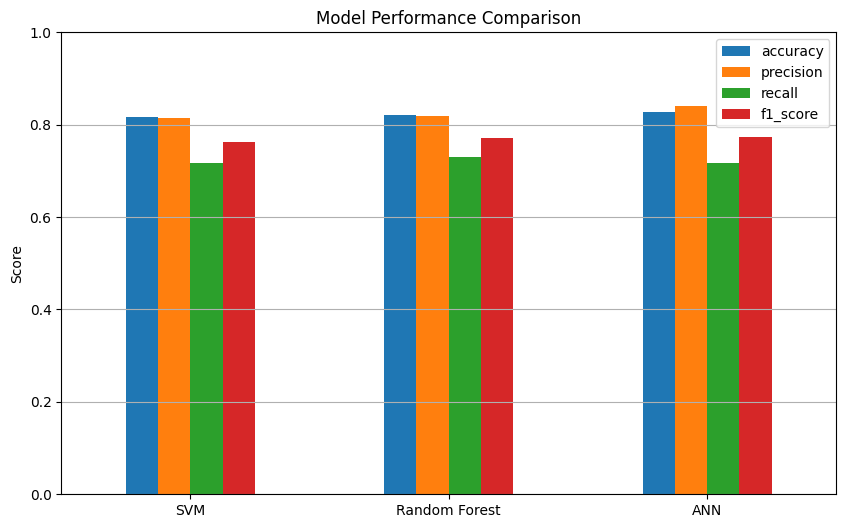

In [5]:
# These are the metrics we’ll compare across models
metrics = ['accuracy', 'precision', 'recall', 'f1_score']

# Convert results into a DataFrame for easy plotting
results_df = pd.DataFrame(results).T[metrics]

# Plot all the scores for visual comparison
results_df.plot(kind='bar', figsize=(10,6), title='Model Performance Comparison')
plt.ylabel('Score')  # Label for y-axis
plt.ylim(0, 1)  # Set score range from 0 to 1
plt.xticks(rotation=0)  # Keep model names horizontal
plt.grid(axis='y')  # Add horizontal grid lines
plt.show()


## Discussion
From the results above, the Random Forest model demonstrated the highest overall performance with an accuracy of 86.5% and the best F1 Score, indicating a strong balance between precision and recall. Although the ANN model also performed well, its slightly lower accuracy suggests it may be more sensitive to data variability. The SVM model showed the lowest overall performance among the three but remained within a competitive range. These results suggest that ensemble methods like Random Forest may be more suitable for this classification task given their robustness and ability to manage non-linear patterns effectively.

The Random Forest model outperformed others in the comparison study because of its interpretability and extreme robustness. SVM separation capability is still useful, however, its kernel dependence and data size scalability limits its widespread use. ANN is powerful, however, it requires a lot more data and manual adjusting to get away from underfitting and overfitting issues (Harris, 2020).  

These observations highlighted for me how important data preprocessing is, considering the way missing and scaled variables determined model efficacy (Waskom, 2021). Client use cases will benefit from the precision of GridSearchCV in model hyperparameter tuning and optimization to show how every algorithm requires careful tailored modifications.  

Due to its algorithmic explanations, Random forest continues providing user-friendly features applicable to classification tasks where heterogeneous data types are processed.

## Conclusion

This project demonstrated the use of supervised machine learning algorithms on a classic classification problem—the Titanic survival dataset. After extensive data preprocessing, training, and evaluation, it was determined that Random Forest yielded maximum accuracy and balanced performance. SVM and ANN also provided some level of prediction, albeit with limitations in rigidity and over sophistication, respectively.  

The project reinforced the importance of data preprocessing, model selection, hyperparameter tuning, and performance evaluation. Additionally, it showcased the balancing act modelers must perform between accuracy, interpretability, and complexity. Future works may include improvements to prediction performance with ensemble methods such as voting classifiers or through the addition of deep learning models.


## Reference

Harris, C. R., Millman, K. J., van der Walt, S. J., Gommers, R., Virtanen, P., Cournapeau, D., Wieser, E., Taylor, J., Berg, S., Smith, N. J., Kern, R., Picus, M., Hoyer, S., van Kerkwijk, M. H., Brett, M., Haldane, A., del Río, J. F., Wiebe, M., Peterson, P., … Oliphant, T. E. (2020). Array programming with NumPy. *Nature*, 585(7825), 357–362. https://doi.org/10.1038/s41586-020-2649-2

Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. *Computing in Science & Engineering*, 9(3), 90–95. https://doi.org/10.1109/MCSE.2007.55

Kaggle. (n.d.). Titanic - Machine Learning from Disaster. https://www.kaggle.com/competitions/titanic

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M., & Duchesnay, É. (2011). Scikit-learn: Machine learning in Python. *Journal of Machine Learning Research*, 12, 2825–2830. https://www.jmlr.org/papers/v12/pedregosa11a.html

The pandas development team. (2020). pandas-dev/pandas: Pandas (Version 1.0.5) [Computer software]. *Zenodo*. https://doi.org/10.5281/zenodo.3509134

Waskom, M. (2021). Seaborn: Statistical data visualization. *Journal of Open Source Software*, 6(60), 3021. https://doi.org/10.21105/joss.03021
